Group Member

1.   Irfan Daniel Teng Bin Mohd Taufiq Teng
2.   Too Yee Shuen
3.   Nur Aisyah Binti Azhar
4.   Sharifah Nur Sarah Binti Syed Zainal Abidin
5.   Iven Low Zi Yin



# Question 1: Exploratory Data Analysis Steps

## Installation

In [1]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vega

In [3]:
pip install --upgrade altair vega vega_datasets

In [4]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


## i) Import required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import altair as alt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## ii) Read dataset into a DataFrame

In [6]:
#Read in cases_state dataset
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv')   # first column is used as index
df

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19499,2023-05-27,Selangor,267,0,221,3257,0,38,0,35,...,3,12,9,42,87,43,30,14,10,17
19500,2023-05-27,Terengganu,0,0,6,325,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19501,2023-05-27,W.P. Kuala Lumpur,215,1,229,2903,19,27,1,31,...,11,5,13,56,72,22,15,11,0,10
19502,2023-05-27,W.P. Labuan,2,0,6,58,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [7]:
df.shape

(19504, 25)

## iii) Descriptive statistics

In [8]:
df.describe()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
count,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,...,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000
mean,261.497590,1.992668,258.647047,3082.635049,27.262254,103.545427,22.356491,70.566704,65.028968,32.641663,...,13.284352,19.357311,16.467545,67.773995,58.091776,34.682629,23.059988,14.811064,6.654532,2.954573
std,697.134857,10.530029,704.641343,8013.681388,76.330607,296.133731,141.010877,219.861544,300.995004,90.511526,...,36.648059,54.506750,44.636717,186.275498,161.418119,96.165620,59.916159,35.390452,14.726755,5.957066
min,0.000000,0.000000,0.000000,-578.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,36.000000,543.000000,0.000000,9.000000,0.000000,3.000000,0.000000,3.000000,...,1.000000,1.000000,2.000000,9.000000,9.000000,5.000000,3.000000,2.000000,1.000000,1.000000
75%,212.000000,0.000000,203.000000,2641.250000,14.000000,68.000000,2.000000,30.000000,21.000000,22.000000,...,9.000000,13.000000,12.000000,52.000000,46.000000,28.000000,20.000000,13.000000,7.000000,3.000000
max,11692.000000,351.000000,12379.000000,103570.000000,1545.000000,6112.000000,3892.000000,3613.000000,7648.000000,1506.000000,...,593.000000,913.000000,647.000000,3132.000000,2911.000000,1762.000000,1071.000000,571.000000,233.000000,82.000000


## iv) Checking missing values

In [9]:
#Locate missing data
print(df.isnull().sum())

date                0
state               0
cases_new           0
cases_import        0
cases_recovered     0
cases_active        0
cases_cluster       0
cases_unvax         0
cases_pvax          0
cases_fvax          0
cases_boost         0
cases_child         0
cases_adolescent    0
cases_adult         0
cases_elderly       0
cases_0_4           0
cases_5_11          0
cases_12_17         0
cases_18_29         0
cases_30_39         0
cases_40_49         0
cases_50_59         0
cases_60_69         0
cases_70_79         0
cases_80            0
dtype: int64


In [10]:
print("Total duplicated rows: ", sum(df.duplicated()))

Total duplicated rows:  0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19504 entries, 0 to 19503
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              19504 non-null  object
 1   state             19504 non-null  object
 2   cases_new         19504 non-null  int64 
 3   cases_import      19504 non-null  int64 
 4   cases_recovered   19504 non-null  int64 
 5   cases_active      19504 non-null  int64 
 6   cases_cluster     19504 non-null  int64 
 7   cases_unvax       19504 non-null  int64 
 8   cases_pvax        19504 non-null  int64 
 9   cases_fvax        19504 non-null  int64 
 10  cases_boost       19504 non-null  int64 
 11  cases_child       19504 non-null  int64 
 12  cases_adolescent  19504 non-null  int64 
 13  cases_adult       19504 non-null  int64 
 14  cases_elderly     19504 non-null  int64 
 15  cases_0_4         19504 non-null  int64 
 16  cases_5_11        19504 non-null  int64 
 17  cases_12_17 

In [12]:
df['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [13]:
df.groupby('state').mean()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
state,,,,,,,,,,,,,,,,,,,,,
Johor,328.423298,2.500410,322.771944,4704.428220,59.105004,150.092699,32.324036,85.056604,60.949959,41.613618,...,17.559475,24.054143,18.281378,91.799016,72.201805,41.083675,27.439705,18.543888,8.664479,3.869565
Kedah,263.357670,2.570960,261.136177,2382.117309,19.065628,106.922067,23.237080,81.490566,51.707957,39.985234,...,16.271534,23.713700,19.773585,64.516817,49.347826,32.796555,24.808039,16.431501,7.276456,3.212469
Kelantan,215.267432,2.004922,213.745693,2088.226415,22.808860,92.909762,16.503692,83.200984,22.652994,35.978671,...,14.401969,21.576702,20.617719,48.410172,36.905660,24.566858,21.114028,16.129614,7.818704,2.858080
Melaka,122.981132,1.547990,120.470057,1824.191140,23.933552,48.224774,9.067268,31.544709,34.144381,14.894996,...,6.536505,8.358491,8.031173,34.742412,27.377358,15.120591,10.204266,7.117309,3.395406,1.684988
Negeri Sembilan,191.347006,1.141099,189.726005,2069.224774,28.921247,80.282199,11.928630,45.188679,53.947498,23.753897,...,9.326497,14.427400,13.773585,49.488925,42.776866,24.663659,16.109926,10.713700,4.054963,1.804758
Pahang,151.151764,1.274815,149.678425,1924.027071,23.009844,59.355209,10.222313,51.269893,30.304348,25.560295,...,10.387203,15.173093,10.748154,36.308450,31.876948,18.323216,12.871206,8.557834,4.090238,1.615258
Perak,198.586546,2.018048,196.136177,1988.589828,29.931091,78.197703,17.076292,55.520919,47.791632,23.100082,...,9.907301,13.192781,12.496308,49.526661,38.726825,23.744873,19.274815,15.807219,8.431501,4.092699
Perlis,15.869565,0.164889,15.627564,183.600492,0.963905,4.244463,0.767842,8.107465,2.749795,2.192781,...,0.957342,1.235439,0.830189,3.771124,3.420016,1.917145,1.478261,1.197703,0.702215,0.340443
Pulau Pinang,254.872847,0.726005,252.631665,2246.857260,27.758819,91.597211,25.528302,71.067268,66.680066,26.546349,...,10.714520,15.831829,13.294504,71.685808,53.123872,36.086136,24.694832,16.575062,8.344545,3.972108


In [14]:
df['date'] = pd.to_datetime(df['date'])

## Data Visualisation

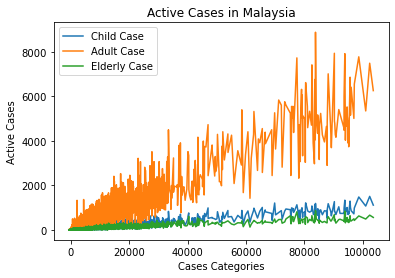

In [15]:
df_sorted = df.sort_values(by='cases_active', ascending=False)

x = df_sorted['cases_active']
y1 = df_sorted['cases_child']
y2 = df_sorted['cases_adult']
y3 = df_sorted['cases_elderly']

plt.plot(x, y1, label='Child Case')
plt.plot(x, y2, label='Adult Case')
plt.plot(x, y3, label='Elderly Case')


plt.xlabel('Cases Categories')
plt.ylabel('Active Cases')
plt.title('Active Cases in Malaysia')
plt.legend()



plt.show() 




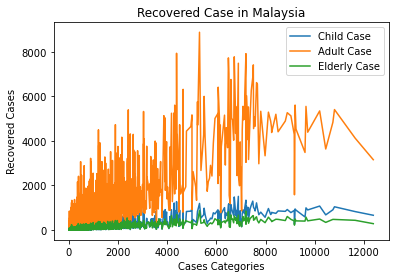

In [16]:
df_sorted = df.sort_values(by='cases_recovered', ascending=False)

x = df_sorted['cases_recovered']
y1 = df_sorted['cases_child']
y2 = df_sorted['cases_adult']
y3 = df_sorted['cases_elderly']

plt.plot(x, y1, label='Child Case')
plt.plot(x, y2, label='Adult Case')
plt.plot(x, y3, label='Elderly Case')


plt.xlabel('Cases Categories')
plt.ylabel('Recovered Cases')
plt.title('Recovered Case in Malaysia')
plt.legend()



plt.show() 

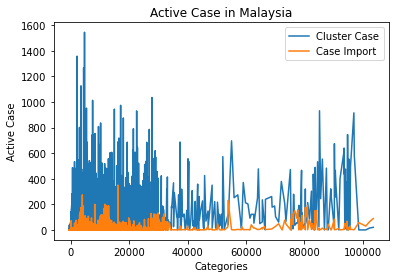

In [17]:
df_sorted = df.sort_values(by='cases_active', ascending=False)

x = df_sorted['cases_active']
y1 = df_sorted['cases_cluster']
y2 = df_sorted['cases_import']


plt.plot(x, y1, label='Cluster Case')
plt.plot(x, y2, label='Case Import')


plt.xlabel('Categories')
plt.ylabel('Active Case')
plt.title('Active Case in Malaysia')
plt.legend()



plt.show() 

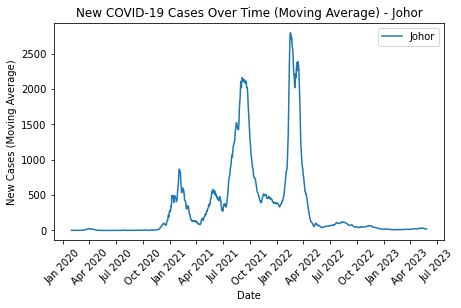

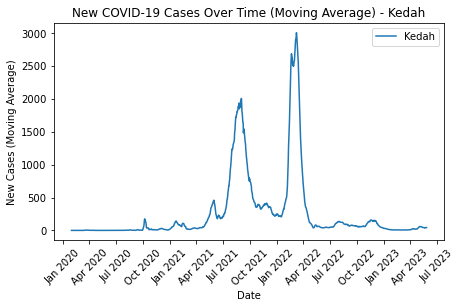

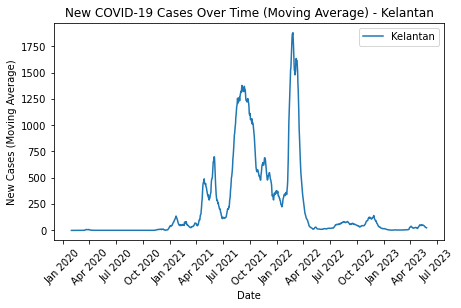

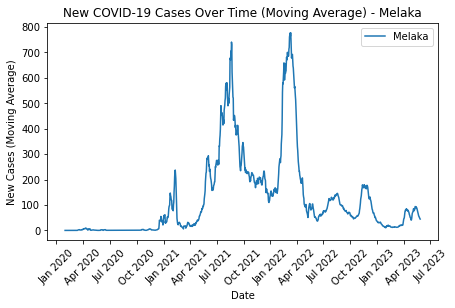

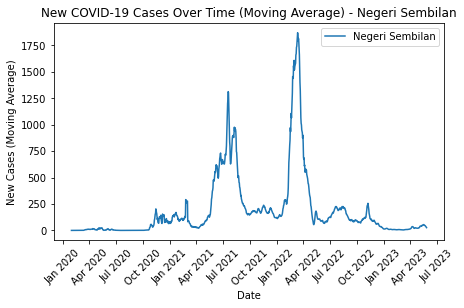

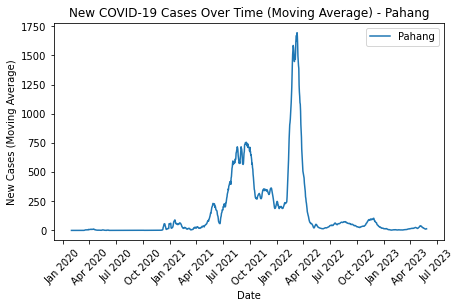

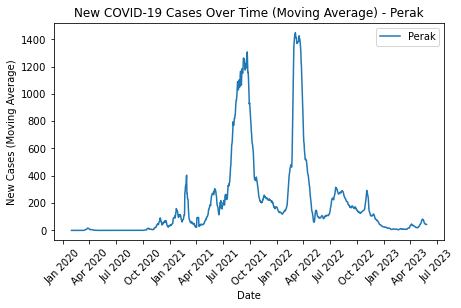

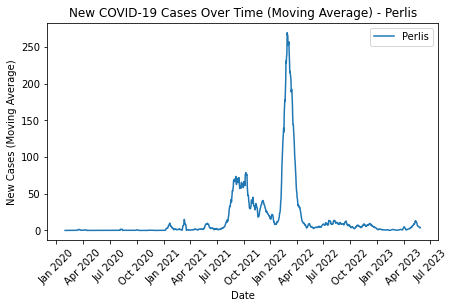

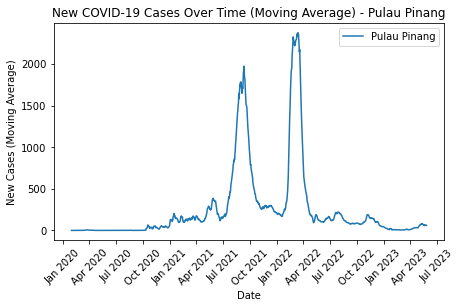

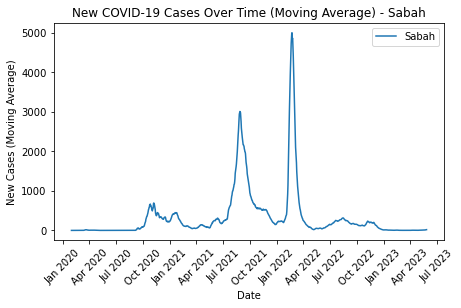

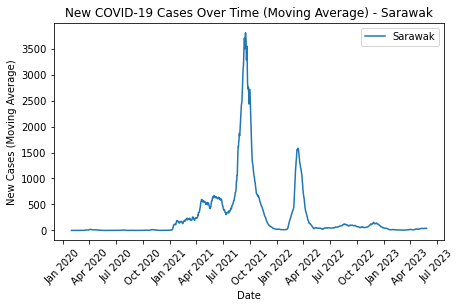

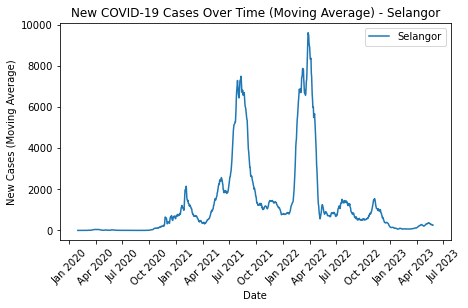

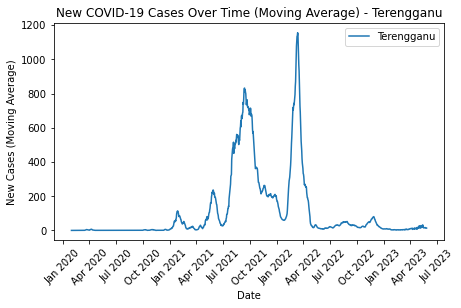

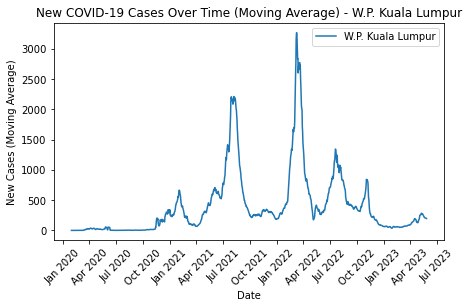

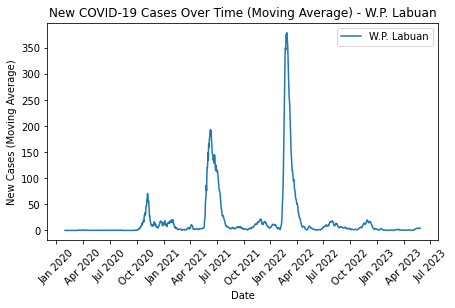

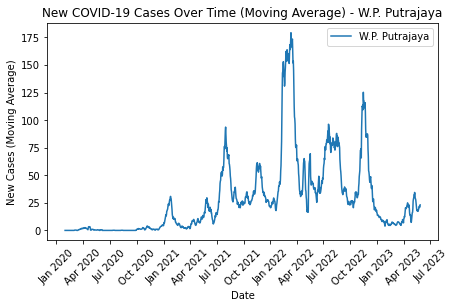

In [18]:
states = df['state'].unique()

for state in states:
    state_data = df[df['state'] == state].copy()

    fig, ax = plt.subplots(figsize=(7, 4))

    state_data['date'] = pd.to_datetime(state_data['date'])

    state_data['moving_avg'] = state_data['cases_new'].rolling(window=7).mean()

    ax.plot(state_data['date'], state_data['moving_avg'], label=state)

    ax.set_xlabel('Date')
    ax.set_ylabel('New Cases (Moving Average)')
    ax.set_title(f'New COVID-19 Cases Over Time (Moving Average) - {state}')

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_tick_params(rotation=45)

    ax.legend()

    plt.show()

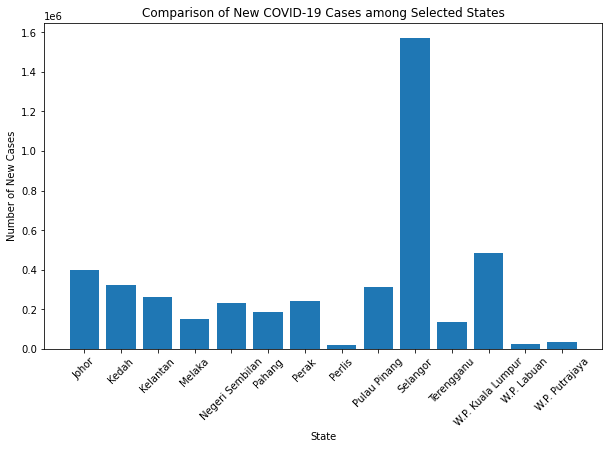

In [19]:
east_selected_states = ['Kelantan', 'Pahang', 'Terengganu']
south_selected_states = ['Johor']
north_selected_states = ['Perlis', 'Kedah', 'Pulau Pinang', 'Perak', 'W.P. Labuan']
west_selected_states = ['W.P. Kuala Lumpur', 'W.P. Putrajaya', 'Selangor', 'Negeri Sembilan', 'Melaka']

selected_states = east_selected_states + south_selected_states + north_selected_states + west_selected_states

state_data = df[df['state'].isin(selected_states)]

new_cases_counts = state_data.groupby('state')['cases_new'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(new_cases_counts.index, new_cases_counts.values)

ax.set_xlabel('State')
ax.set_ylabel('Number of New Cases')
ax.set_title('Comparison of New COVID-19 Cases among Selected States')

plt.xticks(rotation=45)

plt.show()

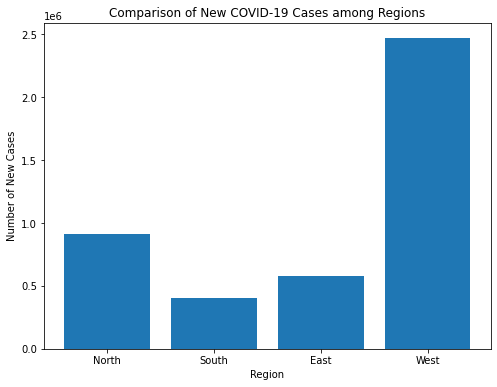

In [20]:
region_mapping = {
    'North': north_selected_states,
    'South': south_selected_states,
    'East': east_selected_states,
    'West': west_selected_states
}

region_new_cases = {}
for region, states in region_mapping.items():
    region_data = state_data[state_data['state'].isin(states)]
    region_new_cases[region] = region_data['cases_new'].sum()

regions = list(region_new_cases.keys())
new_cases_counts = list(region_new_cases.values())

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(regions, new_cases_counts)

ax.set_xlabel('Region')
ax.set_ylabel('Number of New Cases')
ax.set_title('Comparison of New COVID-19 Cases among Regions')

plt.show()

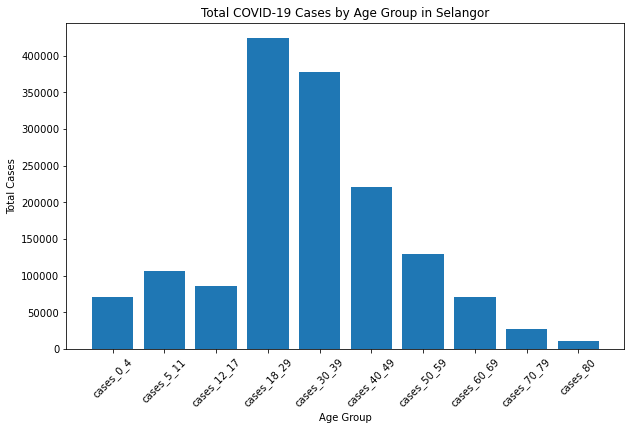

In [21]:
selangor_data = df[df['state'] == 'Selangor']

# Extract the age group columns
age_groups = ['cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39',
              'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80']

# Calculate the total cases for each age group
total_cases = selangor_data[age_groups].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_cases.index, total_cases.values)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Age Group in Selangor')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

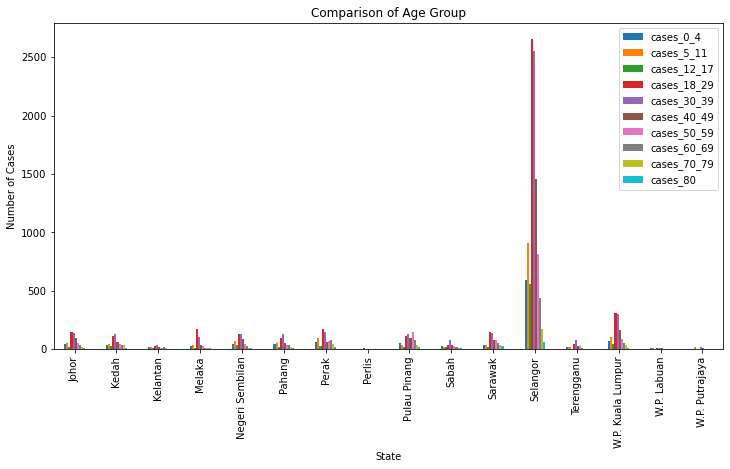

In [22]:
date = pd.to_datetime('2022-04-01')
selected_data = df[df['date'] == date]
selected_data.plot(x='state', y=['cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80'], kind='bar', figsize=(12, 6))
plt.title('Comparison of Age Group')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()

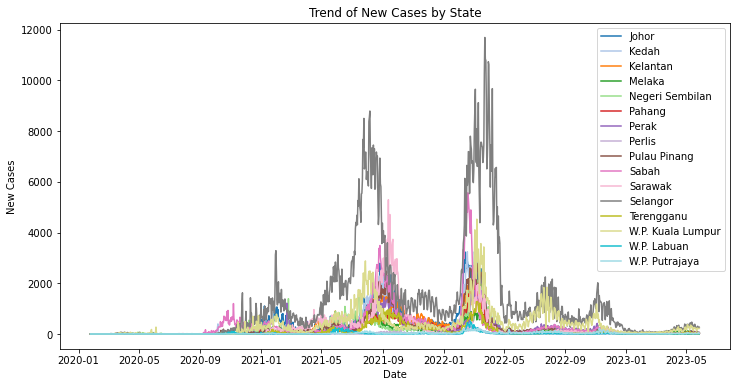

In [23]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(111)
for state, data in df.groupby('state'):
    ax1.plot(data['date'], data['cases_new'], label=state)
plt.title('Trend of New Cases by State')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()


colormap = plt.cm.tab20 #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
  

plt.legend()
plt.show()

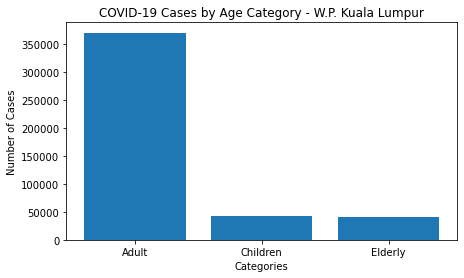

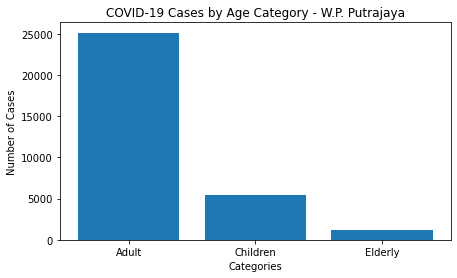

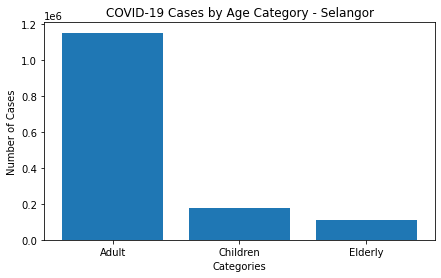

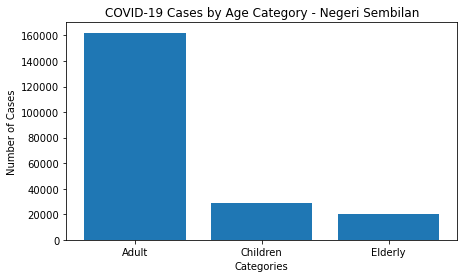

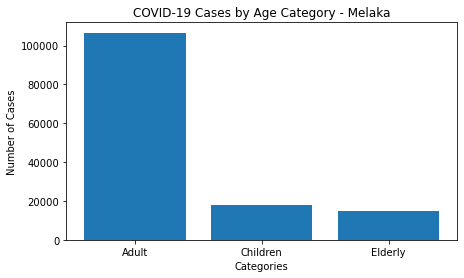

In [24]:
for state in states:
    state_data = df[df['state'] == state].copy()

    adult_cases = state_data['cases_adult'].sum()
    children_cases = state_data['cases_child'].sum()
    elderly_cases = state_data['cases_elderly'].sum()

    categories = ['Adult', 'Children', 'Elderly']
    case_counts = [adult_cases, children_cases, elderly_cases]

    fig, ax = plt.subplots(figsize=(7, 4))

    ax.bar(categories, case_counts)

    ax.set_xlabel('Categories')
    ax.set_ylabel('Number of Cases')
    ax.set_title(f'COVID-19 Cases by Age Category - {state}')

    plt.show()

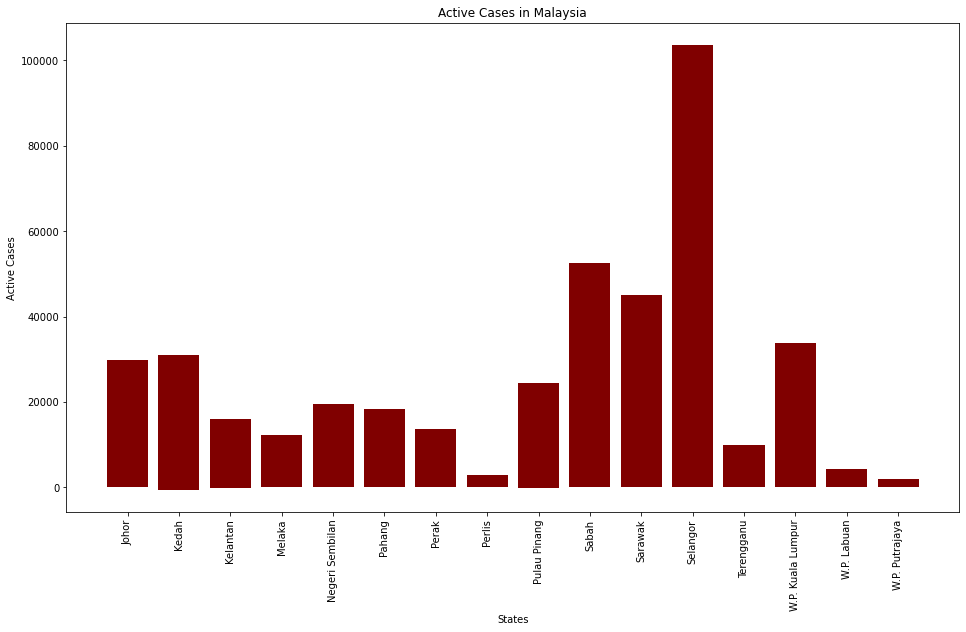

In [25]:
#vii. Data Visualization using Bar Chart 
# creating the dataset

states = df['state']
data_df = df['cases_active']
#values = df[]



fig, ax = plt.subplots(figsize = (16, 9))
 
#creating the bar plot
plt.bar(states, data_df, color ='maroon')
#width = 0.7
plt.xticks(rotation = 90)

# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')

plt.xlabel("States")
plt.ylabel("Active Cases")

plt.title("Active Cases in Malaysia")
plt.show()



In [26]:
data_df.sum()

60123714

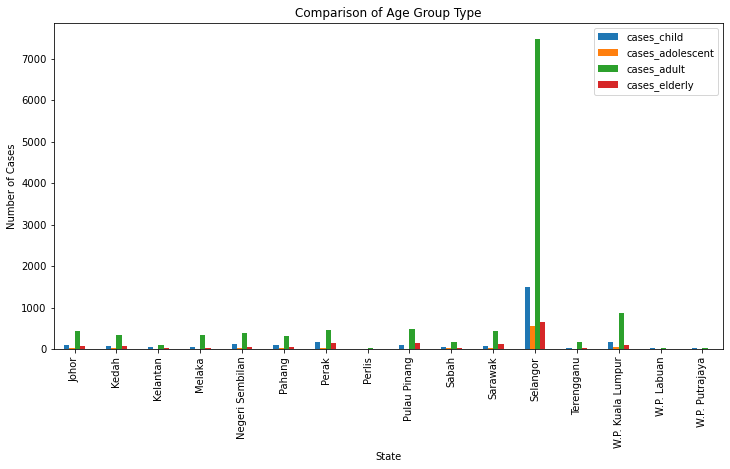

In [27]:
date = pd.to_datetime('2022-04-01')
selected_data = df[df['date'] == date]
selected_data.plot(x='state', y=['cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly'], kind='bar', figsize=(12, 6))
plt.title('Comparison of Age Group Type')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()

## vi) Finding outliers within 3-months range

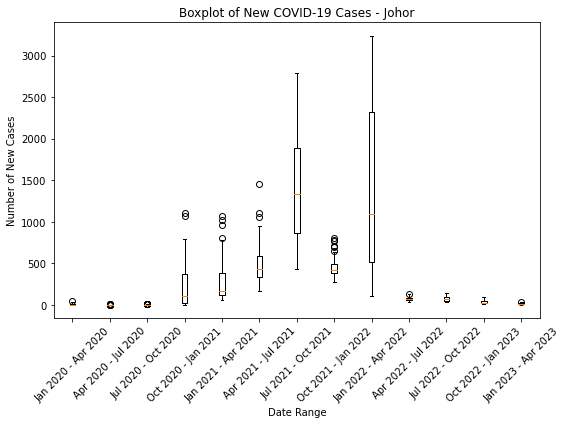

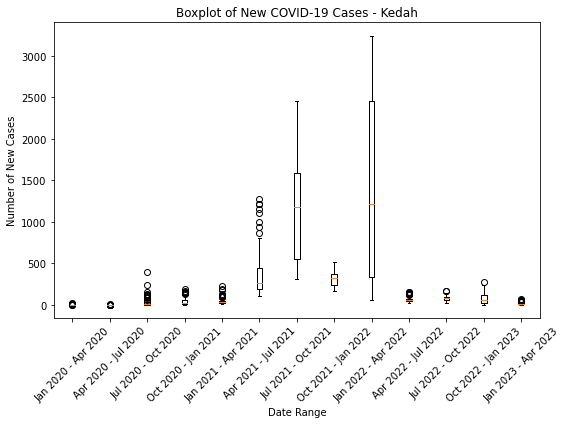

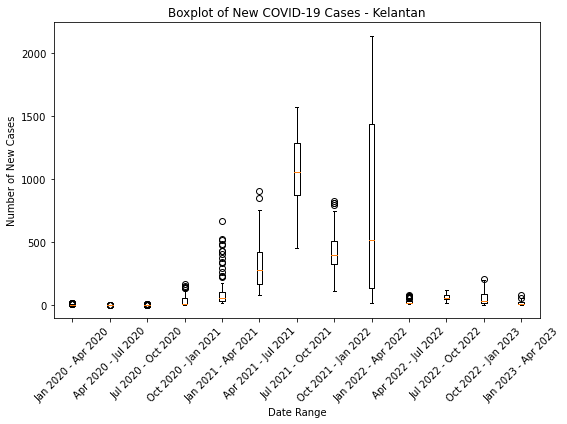

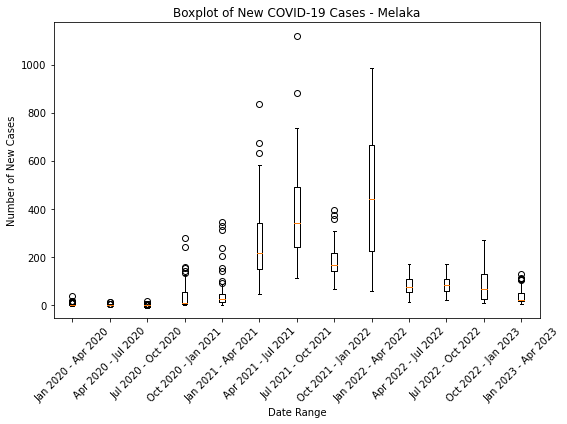

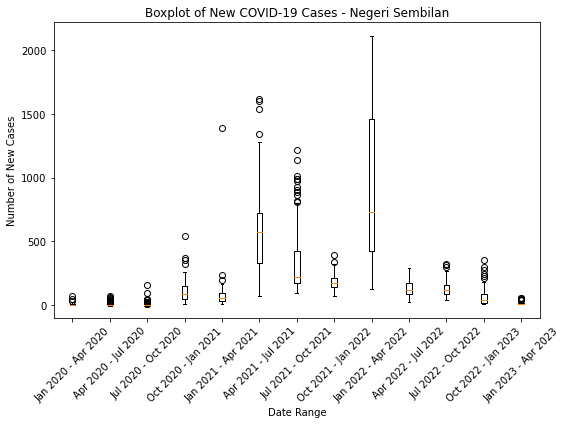

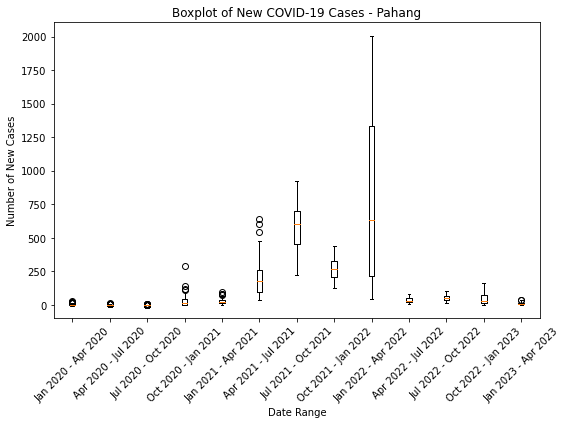

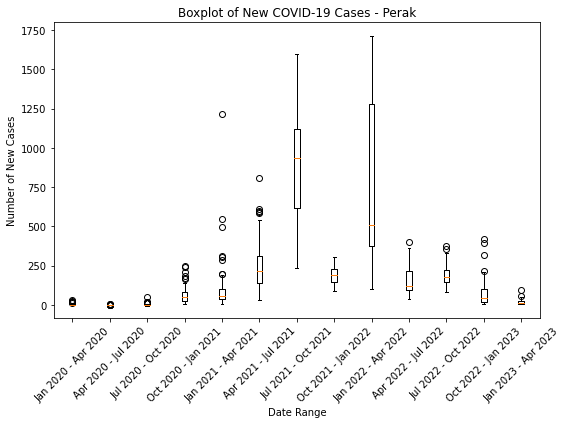

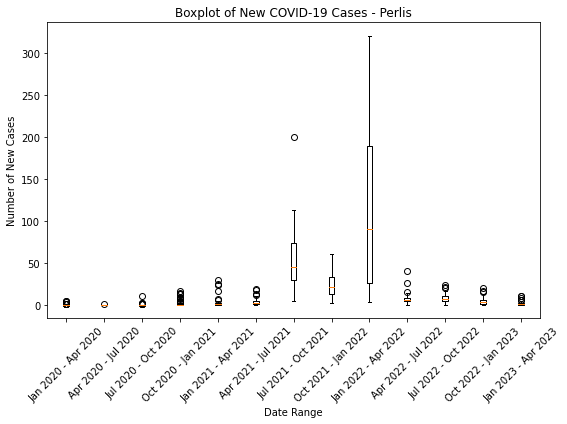

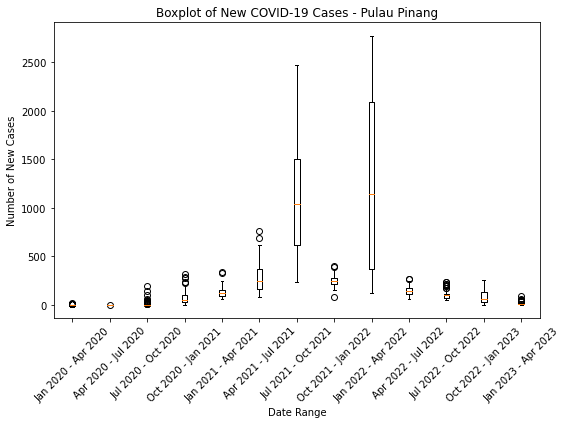

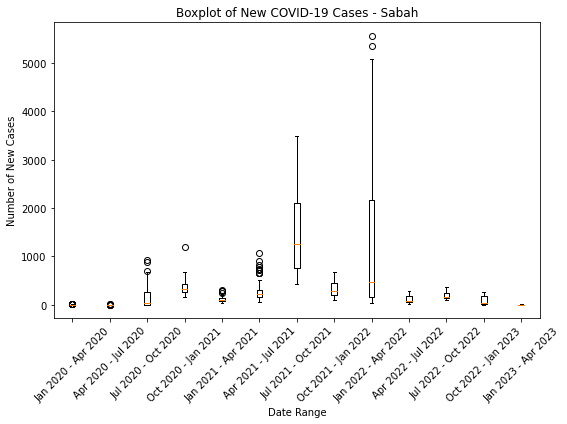

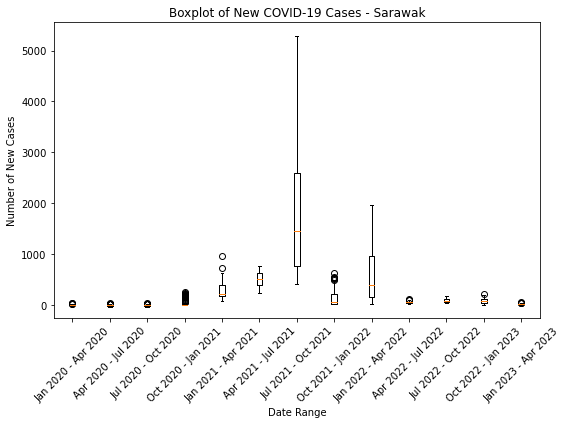

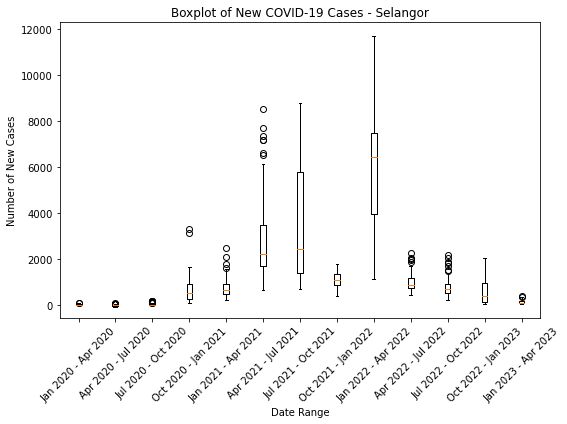

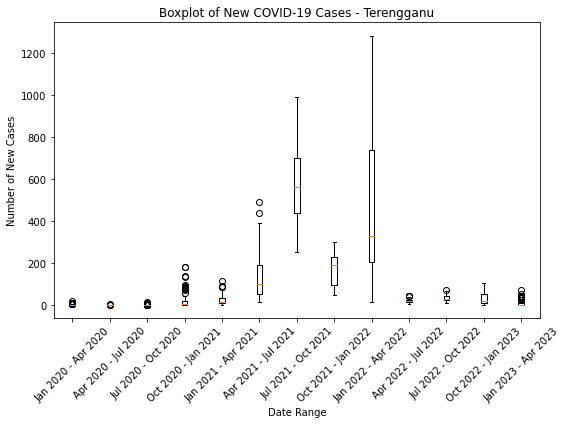

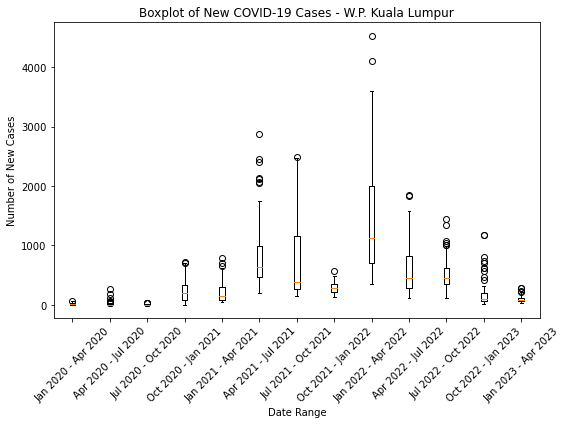

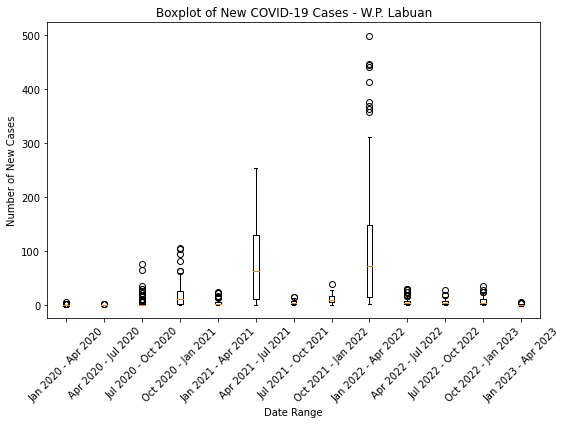

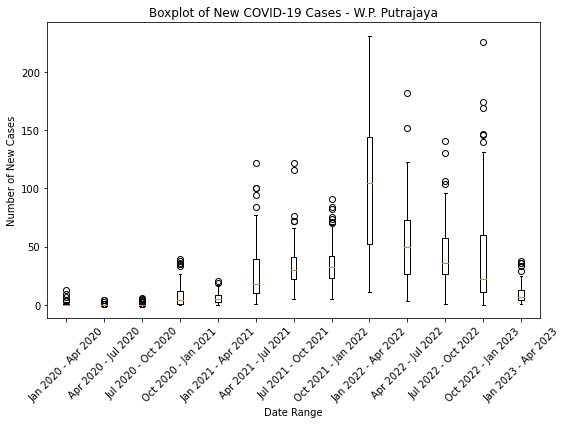

In [28]:
# Define the 3-month interval
start_date = df['date'].min()
end_date = df['date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='3M')

# Iterate over each state
states = df['state'].unique()
for state in states:
    state_data = df[df['state'] == state]

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # Iterate over the date ranges and plot boxplots
    for i in range(len(date_range) - 1):
        start = date_range[i]
        end = date_range[i + 1]

        # Filter data within the current date range
        filtered_data = state_data[(state_data['date'] >= start) & (state_data['date'] < end)]

        # Create a boxplot for the cases_new attribute
        ax.boxplot(filtered_data['cases_new'], positions=[i])

    # Set x-axis tick labels as range of dates
    ax.set_xticks(range(len(date_range) - 1))
    ax.set_xticklabels([f'{start.strftime("%b %Y")} - {end.strftime("%b %Y")}' for start, end in zip(date_range[:-1], date_range[1:])])

    # Set labels and title
    ax.set_xlabel('Date Range')
    ax.set_ylabel('Number of New Cases')
    ax.set_title(f'Boxplot of New COVID-19 Cases - {state}')

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

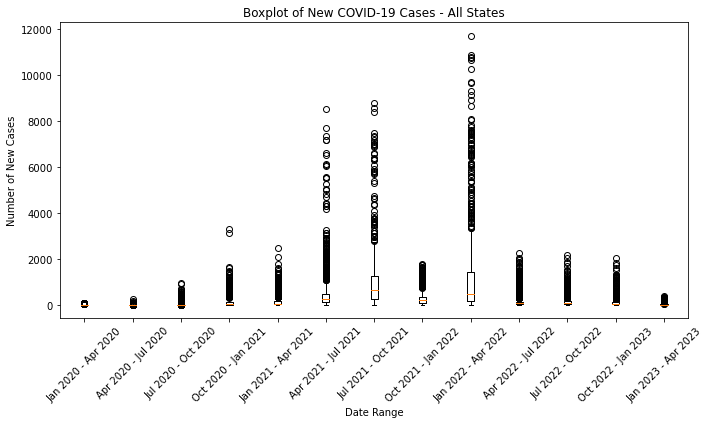

In [29]:
# Define the 3-month interval
start_date = df['date'].min()
end_date = df['date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='3M')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the date ranges and plot boxplots for all states
for i in range(len(date_range) - 1):
    start = date_range[i]
    end = date_range[i + 1]

    # Filter data within the current date range
    filtered_data = df[(df['date'] >= start) & (df['date'] < end)]

    # Create a boxplot for the cases_new attribute
    ax.boxplot(filtered_data['cases_new'], positions=[i])

# Set x-axis tick labels as range of dates
ax.set_xticks(range(len(date_range) - 1))
ax.set_xticklabels([f'{start.strftime("%b %Y")} - {end.strftime("%b %Y")}' for start, end in zip(date_range[:-1], date_range[1:])])

# Set labels and title
ax.set_xlabel('Date Range')
ax.set_ylabel('Number of New Cases')
ax.set_title('Boxplot of New COVID-19 Cases - All States')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Question 2: What are the states that exhibit strong correlation with (i) Pahang, and (ii) Johor?

state
Pahang             1.000000
Kedah              0.934713
Pulau Pinang       0.929373
Terengganu         0.902446
Johor              0.901529
Kelantan           0.894666
Perlis             0.890536
Melaka             0.874284
Perak              0.859636
Negeri Sembilan    0.805272
Name: Pahang, dtype: float64


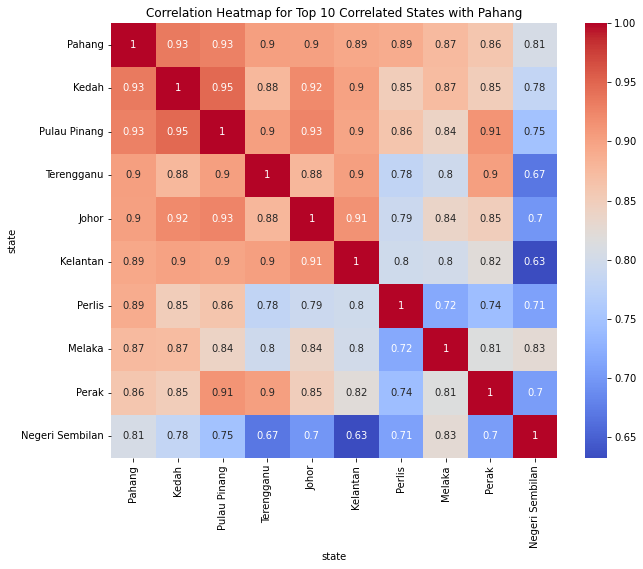

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv')   # first column is used as index

columns_of_interest = ['date', 'state', 'cases_new']
df2 = df[columns_of_interest]

pivot_table = df2.pivot(index='date', columns='state', values='cases_new')

correlation_matrix = pivot_table.corr()

pahang_corr = correlation_matrix['Pahang'].sort_values(ascending=False)

top_10_correlated_states_pahang = pahang_corr.head(10)

print(top_10_correlated_states_pahang)

# Create a correlation heatmap for the top 10 correlated states with Pahang
top_10_states = top_10_correlated_states_pahang.index.tolist()
correlation_heatmap = correlation_matrix[top_10_states].loc[top_10_states]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Top 10 Correlated States with Pahang')
plt.show()


state
Johor           1.000000
Pulau Pinang    0.926602
Kedah           0.921223
Kelantan        0.914735
Pahang          0.901529
Terengganu      0.878593
Sabah           0.855389
Perak           0.848161
Melaka          0.837104
Perlis          0.792079
Name: Johor, dtype: float64


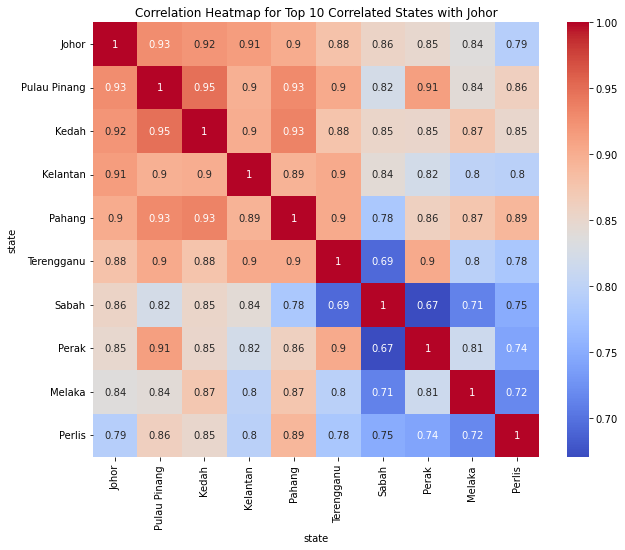

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv')   # first column is used as index

columns_of_interest = ['date', 'state', 'cases_new']
df2 = df[columns_of_interest]

pivot_table = df2.pivot(index='date', columns='state', values='cases_new')

correlation_matrix = pivot_table.corr()

johor_corr = correlation_matrix['Johor'].sort_values(ascending=False)

top_10_correlated_states_johor = johor_corr.head(10)

print(top_10_correlated_states_johor)

# Create a correlation heatmap for the top 10 correlated states with Johor
top_10_states = top_10_correlated_states_johor.index.tolist()
correlation_heatmap = correlation_matrix[top_10_states].loc[top_10_states]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Top 10 Correlated States with Johor')
plt.show()

# Question 3: What are the strong features/indicators to daily cases for (i) Pahang, (ii) Kedah, (iii) Johor, and (iv) Selangor?

## Label Encoding

In [32]:
fourstates = ['Pahang', 'Kedah', 'Johor', 'Selangor']
df_states = df[df['state'].isin(fourstates)].copy()
df_states

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-25,Pahang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2020-01-25,Selangor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2020-01-26,Johor,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,2023-05-26,Selangor,251,0,298,3211,0,28,0,32,...,7,8,8,61,74,45,19,9,8,12
19488,2023-05-27,Johor,19,0,19,2162,0,2,0,4,...,0,0,0,3,3,1,5,2,2,3
19489,2023-05-27,Kedah,16,0,22,-39,0,4,0,3,...,1,1,0,2,4,2,1,1,2,2
19493,2023-05-27,Pahang,15,0,11,761,0,1,0,5,...,0,0,0,4,2,5,3,1,0,0


In [33]:
df_states = df_states.drop('date', axis=1) # Date will not be used
df_encoded = df_states.copy() # Create copy for encoding

# Label encoding
label_encoder = preprocessing.LabelEncoder()
state_label_mappings = {}

for col in df_encoded.select_dtypes(include='object').columns:
    encoded_values = label_encoder.fit_transform(df_encoded[col])
    df_encoded[col] = encoded_values
    state_label_mappings[col] = dict(zip(encoded_values, df_states[col]))

for col, mapping in state_label_mappings.items():
    print(f"{col}: {mapping}")

state: {0: 'Johor', 1: 'Kedah', 2: 'Pahang', 3: 'Selangor'}


In [34]:
df_encoded

,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,0,4,4,0,4,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,3,251,0,298,3211,0,28,0,32,191,...,7,8,8,61,74,45,19,9,8,12
19488,0,19,0,19,2162,0,2,0,4,13,...,0,0,0,3,3,1,5,2,2,3
19489,1,16,0,22,-39,0,4,0,3,9,...,1,1,0,2,4,2,1,1,2,2
19493,2,15,0,11,761,0,1,0,5,9,...,0,0,0,4,2,5,3,1,0,0


In [35]:
unique_states = df_encoded['state'].unique()
print(unique_states)

[0 1 2 3]


## Boruta

In [36]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))

def boruta_feature_selection(df_encoded, state_encoded):
    y = df_encoded['cases_new']
    X = df_encoded.drop('cases_new', axis=1)
    colnames = X.columns

    # Use 80-20 split, random state = 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    X_state = X[X['state'] == state_encoded]
    y_state = y[X['state'] == state_encoded]

    rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", max_depth=5)
    feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)
    feat_selector.fit(X_state.values, y_state.values.ravel())

    state_boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
    state_boruta_score = pd.DataFrame(list(state_boruta_score.items()), columns=['Features', 'Score'])
    state_boruta_score = state_boruta_score.sort_values('Score', ascending=False)

    return state_boruta_score

# Johor
johor_encoded = 0
johor_boruta_score = boruta_feature_selection(df_encoded, johor_encoded)

# Kedah
kedah_encoded = 1
kedah_boruta_score = boruta_feature_selection(df_encoded, kedah_encoded)

# Pahang
pahang_encoded = 2
pahang_boruta_score = boruta_feature_selection(df_encoded, pahang_encoded)

# Selangor
selangor_encoded = 3
selangor_boruta_score = boruta_feature_selection(df_encoded, selangor_encoded)

# Print the top 10 features for Johor
print('---------Top 10 Johor----------')
display(johor_boruta_score.head(10))

# Print the bottom 10 features for Johor
print('\n---------Bottom 10 Johor----------')
display(johor_boruta_score.tail(10))

# Print the top 10 features for Kedah
print('---------Top 10 Kedah----------')
display(kedah_boruta_score.head(10))

# Print the bottom 10 features for Kedah
print('\n---------Bottom 10 Kedah----------')
display(kedah_boruta_score.tail(10))

# Print the top 10 features for Pahang
print('---------Top 10 Pahang----------')
display(pahang_boruta_score.head(10))

# Print the bottom 10 features for Pahang
print('\n---------Bottom 10 Pahang----------')
display(pahang_boruta_score.tail(10))

# Print the top 10 features for Kedah
print('---------Top 10 Selangor----------')
display(selangor_boruta_score.head(10))

# Print the bottom 10 features for Kedah
print('\n---------Bottom 10 Selangor----------')
display(selangor_boruta_score.tail(10))

---------Top 10 Johor----------


,Features,Score
11,cases_adult,1.0
9,cases_child,1.0
18,cases_40_49,1.0
17,cases_30_39,1.0
16,cases_18_29,1.0
14,cases_5_11,1.0
13,cases_0_4,1.0
12,cases_elderly,1.0
20,cases_60_69,1.0
10,cases_adolescent,1.0



---------Bottom 10 Johor----------


,Features,Score
3,cases_active,1.00
19,cases_50_59,1.00
15,cases_12_17,0.86
2,cases_recovered,0.86
4,cases_cluster,0.71
6,cases_pvax,0.57
1,cases_import,0.43
22,cases_80,0.29
8,cases_boost,0.29
0,state,0.00


---------Top 10 Kedah----------


,Features,Score
11,cases_adult,1.0
9,cases_child,1.0
15,cases_12_17,1.0
14,cases_5_11,1.0
13,cases_0_4,1.0
12,cases_elderly,1.0
18,cases_40_49,1.0
10,cases_adolescent,1.0
19,cases_50_59,1.0
17,cases_30_39,1.0



---------Bottom 10 Kedah----------


,Features,Score
21,cases_70_79,1.00
3,cases_active,1.00
2,cases_recovered,1.00
16,cases_18_29,1.00
22,cases_80,0.83
6,cases_pvax,0.67
1,cases_import,0.50
4,cases_cluster,0.33
8,cases_boost,0.17
0,state,0.00


---------Top 10 Pahang----------


,Features,Score
11,cases_adult,1.0
9,cases_child,1.0
15,cases_12_17,1.0
14,cases_5_11,1.0
13,cases_0_4,1.0
12,cases_elderly,1.0
18,cases_40_49,1.0
10,cases_adolescent,1.0
19,cases_50_59,1.0
17,cases_30_39,1.0



---------Bottom 10 Pahang----------


,Features,Score
21,cases_70_79,1.00
3,cases_active,1.00
2,cases_recovered,1.00
16,cases_18_29,1.00
22,cases_80,0.83
6,cases_pvax,0.67
8,cases_boost,0.50
1,cases_import,0.33
4,cases_cluster,0.17
0,state,0.00


---------Top 10 Selangor----------


,Features,Score
11,cases_adult,1.0
16,cases_18_29,1.0
2,cases_recovered,1.0
3,cases_active,1.0
21,cases_70_79,1.0
5,cases_unvax,1.0
6,cases_pvax,1.0
19,cases_50_59,1.0
18,cases_40_49,1.0
12,cases_elderly,1.0



---------Bottom 10 Selangor----------


,Features,Score
7,cases_fvax,0.86
20,cases_60_69,0.86
9,cases_child,0.86
22,cases_80,0.71
15,cases_12_17,0.71
10,cases_adolescent,0.71
4,cases_cluster,0.43
1,cases_import,0.29
8,cases_boost,0.14
0,state,0.00


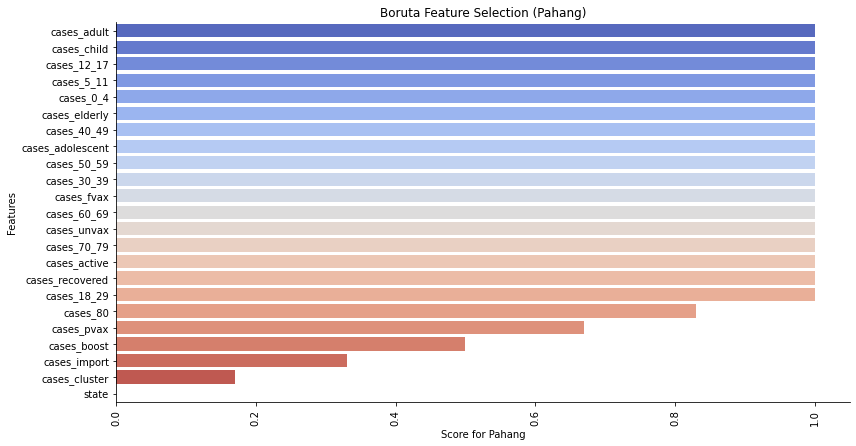

In [37]:
#Pahang Feature Importance Visualization
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=pahang_boruta_score, kind="bar",
                              height=6, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Pahang)")

sns_boruta_plot.set(xlabel="Score for Pahang")  
plt.xticks(rotation=90)

plt.show()

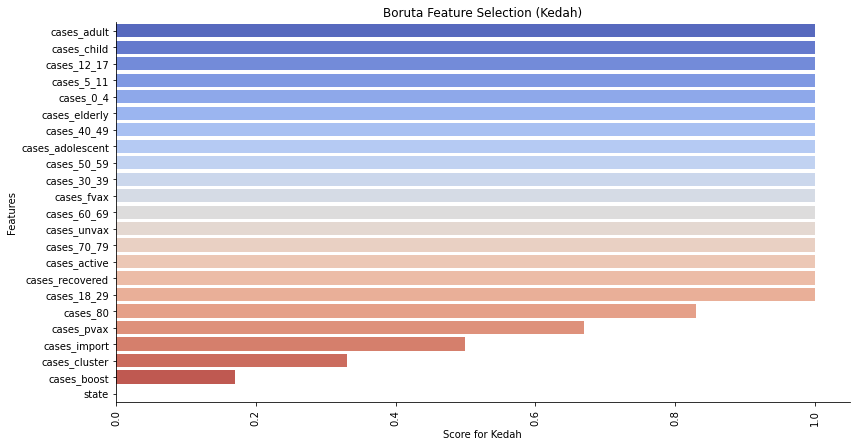

In [38]:
#Kedah Feature Importance Visualization
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=kedah_boruta_score, kind="bar",
                              height=6, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Kedah)")

sns_boruta_plot.set(xlabel="Score for Kedah")  
plt.xticks(rotation=90)

plt.show()

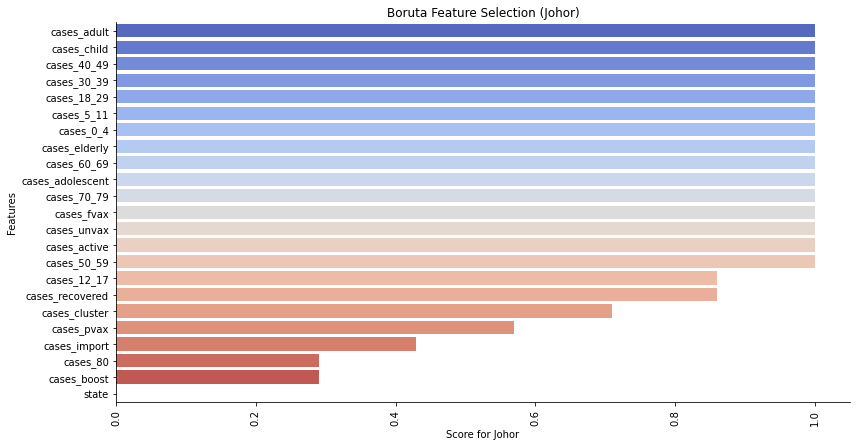

In [39]:
#Johor Feature Importance Visualization
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=johor_boruta_score, kind="bar",
                              height=6, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Johor)")

sns_boruta_plot.set(xlabel="Score for Johor")  
plt.xticks(rotation=90)

plt.show()

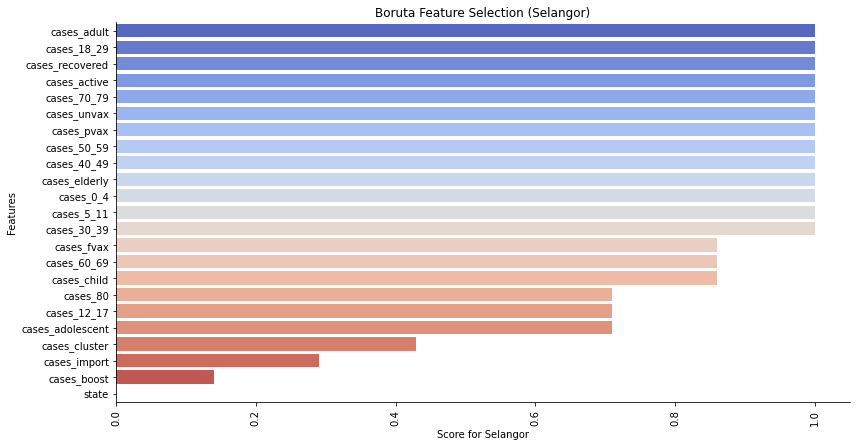

In [40]:
#Selangor Feature Importance Visualization
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=selangor_boruta_score, kind="bar",
                              height=6, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Selangor)")

sns_boruta_plot.set(xlabel="Score for Selangor")  
plt.xticks(rotation=90)

plt.show()

## Recursive Feature Elimination (RFE)

In [41]:
def rfe_feature_selection(df_encoded, state_encoded):
    y = df_encoded['cases_new']
    X = df_encoded.drop('cases_new', axis=1)
    colnames = X.columns

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    X_state_train = X_train[X_train['state'] == state_encoded]
    y_state_train = y_train[X_train['state'] == state_encoded]

    rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", max_depth=5, n_estimators=50)
    rfe = RFECV(rf, min_features_to_select=1, cv=3)
    rfe.fit(X_state_train, y_state_train)

    state_rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
    state_rfe_score = pd.DataFrame(list(state_rfe_score.items()), columns=['Features', 'Score'])
    state_rfe_score = state_rfe_score.sort_values('Score', ascending=False)

    return state_rfe_score

# Johor
johor_encoded = 0
johor_rfe_score = rfe_feature_selection(df_encoded, johor_encoded)

# Kedah
kedah_encoded = 1
kedah_rfe_score = rfe_feature_selection(df_encoded, kedah_encoded)

# Pahang
pahang_encoded = 2
pahang_rfe_score = rfe_feature_selection(df_encoded, pahang_encoded)

# Selangor
selangor_encoded = 3
selangor_rfe_score = rfe_feature_selection(df_encoded, selangor_encoded)

# Print the top 10 features for Johor
print('---------Top 10 Johor----------')
display(johor_rfe_score.head(10))

# Print the bottom 10 features for Johor
print('\n---------Bottom 10 Johor----------')
display(johor_rfe_score.tail(10))

# Print the top 10 features for Kedah
print('---------Top 10 Kedah----------')
display(kedah_rfe_score.head(10))

# Print the bottom 10 features for Kedah
print('\n---------Bottom 10 Kedah----------')
display(kedah_rfe_score.tail(10))

# Print the top 10 features for Pahang
print('---------Top 10 Pahang----------')
display(pahang_rfe_score.head(10))

# Print the bottom 10 features for Pahang
print('\n---------Bottom 10 Pahang----------')
display(pahang_rfe_score.tail(10))

# Print the top 10 features for Kedah
print('---------Top 10 Selangor----------')
display(selangor_rfe_score.head(10))

# Print the bottom 10 features for Kedah
print('\n---------Bottom 10 Selangor----------')
display(selangor_rfe_score.tail(10))

---------Top 10 Johor----------


,Features,Score
11,cases_adult,1.00
5,cases_unvax,1.00
3,cases_active,1.00
9,cases_child,1.00
16,cases_18_29,0.95
10,cases_adolescent,0.89
19,cases_50_59,0.84
18,cases_40_49,0.79
15,cases_12_17,0.74
21,cases_70_79,0.68



---------Bottom 10 Johor----------


,Features,Score
17,cases_30_39,0.47
7,cases_fvax,0.42
2,cases_recovered,0.37
6,cases_pvax,0.32
4,cases_cluster,0.26
12,cases_elderly,0.21
8,cases_boost,0.16
22,cases_80,0.11
1,cases_import,0.05
0,state,0.00


---------Top 10 Kedah----------


,Features,Score
17,cases_30_39,1.00
16,cases_18_29,1.00
9,cases_child,1.00
14,cases_5_11,0.95
20,cases_60_69,0.90
12,cases_elderly,0.85
7,cases_fvax,0.80
3,cases_active,0.75
2,cases_recovered,0.70
21,cases_70_79,0.65



---------Bottom 10 Kedah----------


,Features,Score
10,cases_adolescent,0.45
22,cases_80,0.40
5,cases_unvax,0.35
4,cases_cluster,0.30
1,cases_import,0.25
15,cases_12_17,0.20
6,cases_pvax,0.15
11,cases_adult,0.10
8,cases_boost,0.05
0,state,0.00


---------Top 10 Pahang----------


,Features,Score
11,cases_adult,1.00
5,cases_unvax,1.00
18,cases_40_49,0.95
13,cases_0_4,0.90
15,cases_12_17,0.86
16,cases_18_29,0.81
7,cases_fvax,0.76
2,cases_recovered,0.71
19,cases_50_59,0.67
17,cases_30_39,0.62



---------Bottom 10 Pahang----------


,Features,Score
9,cases_child,0.43
12,cases_elderly,0.38
22,cases_80,0.33
3,cases_active,0.29
14,cases_5_11,0.24
1,cases_import,0.19
4,cases_cluster,0.14
6,cases_pvax,0.10
8,cases_boost,0.05
0,state,0.00


---------Top 10 Selangor----------


,Features,Score
2,cases_recovered,1.00
3,cases_active,1.00
21,cases_70_79,1.00
5,cases_unvax,1.00
18,cases_40_49,1.00
9,cases_child,1.00
17,cases_30_39,1.00
12,cases_elderly,1.00
14,cases_5_11,1.00
15,cases_12_17,0.93



---------Bottom 10 Selangor----------


,Features,Score
7,cases_fvax,0.64
16,cases_18_29,0.57
22,cases_80,0.50
11,cases_adult,0.43
8,cases_boost,0.36
6,cases_pvax,0.29
20,cases_60_69,0.21
4,cases_cluster,0.14
1,cases_import,0.07
0,state,0.00


Text(0.5, 1.0, 'RFE Feature Selection for Pahang')

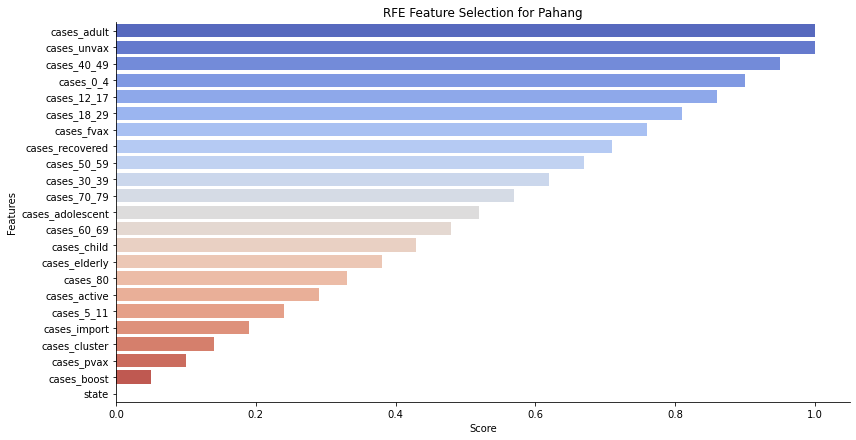

In [42]:
# Pahang
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = pahang_rfe_score, kind = "bar", 
               height=6, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Pahang")

Text(0.5, 1.0, 'RFE Feature Selection for Kedah')

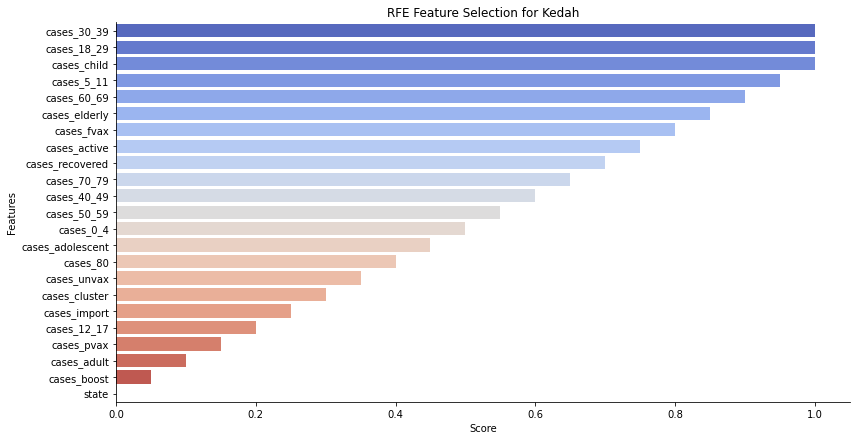

In [43]:
# Kedah
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = kedah_rfe_score, kind = "bar", 
               height=6, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Kedah")

Text(0.5, 1.0, 'RFE Feature Selection for Johor')

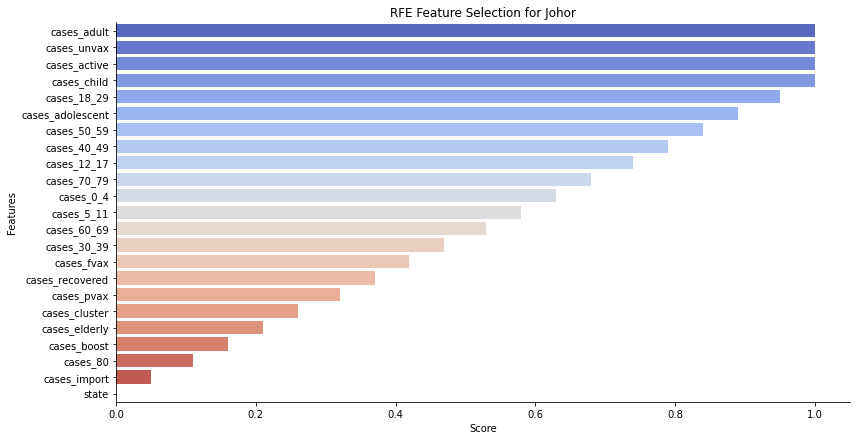

In [44]:
# Johor
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = johor_rfe_score, kind = "bar", 
               height=6, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Johor")

Text(0.5, 1.0, 'RFE Feature Selection for Selangor')

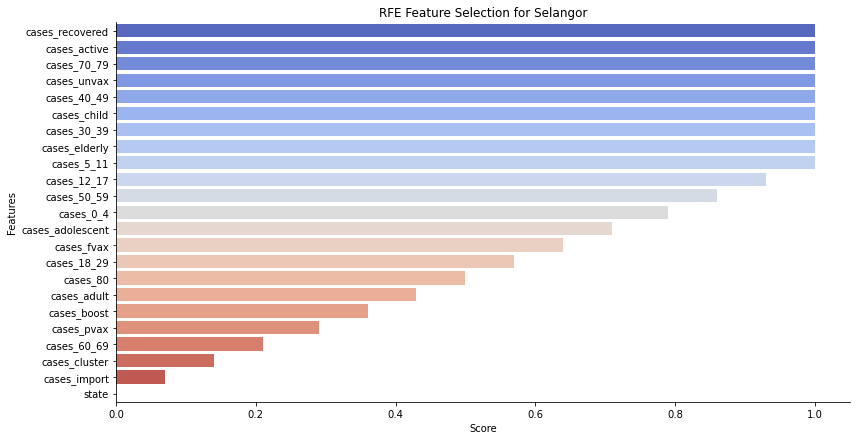

In [45]:
# Selangor
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = selangor_rfe_score, kind = "bar", 
               height=6, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Selangor")


## Boruta and RFE Result Comparison

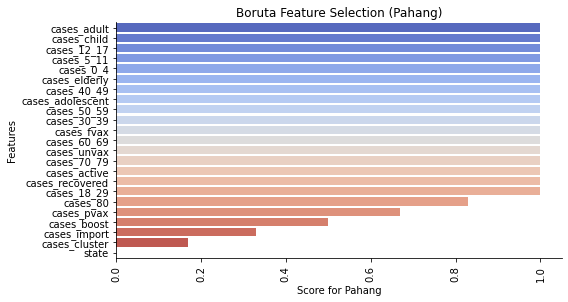

Text(0.5, 1.0, 'RFE Feature Selection for Pahang')

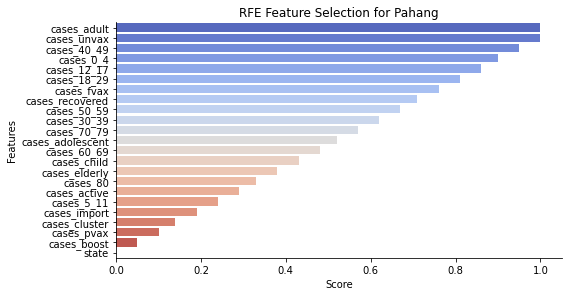

In [46]:
#Pahang
# Boruta
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=pahang_boruta_score, kind="bar",
                              height=4, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Pahang)")

sns_boruta_plot.set(xlabel="Score for Pahang")  
plt.xticks(rotation=90)

plt.show()

# RFE
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = pahang_rfe_score, kind = "bar", 
               height=4, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Pahang")

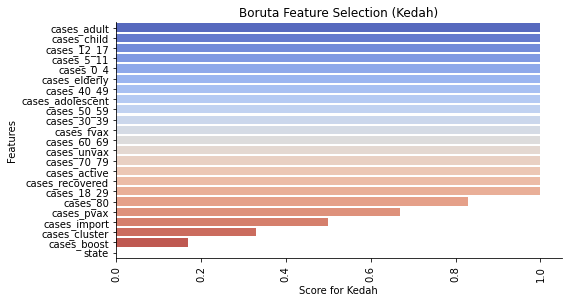

Text(0.5, 1.0, 'RFE Feature Selection for Kedah')

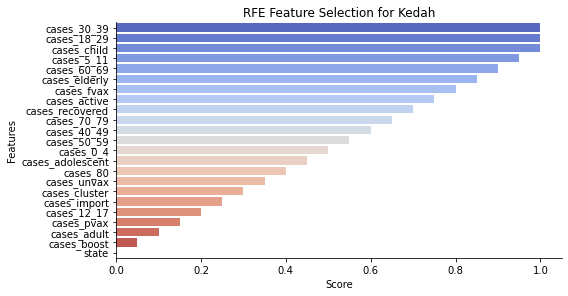

In [47]:
#Kedah
# Boruta
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=kedah_boruta_score, kind="bar",
                              height=4, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Kedah)")

sns_boruta_plot.set(xlabel="Score for Kedah")  
plt.xticks(rotation=90)

plt.show()

# RFE
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = kedah_rfe_score, kind = "bar", 
               height=4, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Kedah")

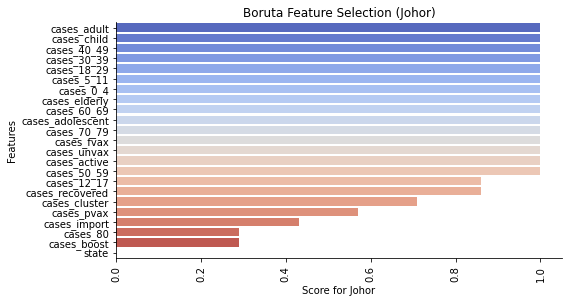

Text(0.5, 1.0, 'RFE Feature Selection for Johor')

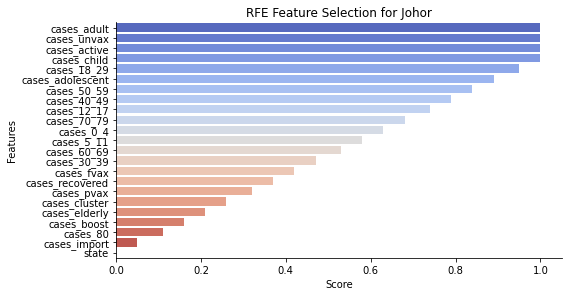

In [48]:
# Johor
# Boruta
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=johor_boruta_score, kind="bar",
                              height=4, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Johor)")

sns_boruta_plot.set(xlabel="Score for Johor")  
plt.xticks(rotation=90)

plt.show()

# RFE
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = johor_rfe_score, kind = "bar", 
               height=4, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Johor")

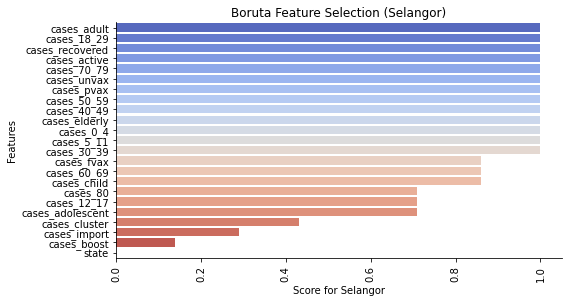

Text(0.5, 1.0, 'RFE Feature Selection for Selangor')

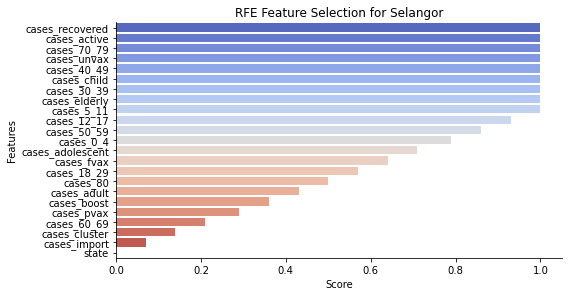

In [49]:
#Selangor
# Boruta
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=selangor_boruta_score, kind="bar",
                              height=4, aspect=2, palette='coolwarm')
sns_boruta_plot.set(title="Boruta Feature Selection (Selangor)")

sns_boruta_plot.set(xlabel="Score for Selangor")  
plt.xticks(rotation=90)

plt.show()

# RFE
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = selangor_rfe_score, kind = "bar", 
               height=4, aspect=2, palette='coolwarm')
plt.title("RFE Feature Selection for Selangor")


# Question 4: Comparing regression and classification models, which model performs well in predicting the daily cases for (i) Pahang, (ii) Kedah, (iii) Johor, and (iv) Selangor?

In [50]:
#Selected training sets for 4 states extracted from boruta feature selection (TOP 10)
selected_features = {
    0: johor_boruta_score['Features'].head(10).tolist(),
    1: kedah_boruta_score['Features'].head(10).tolist(),
    2: pahang_boruta_score['Features'].head(10).tolist(),
    3: selangor_boruta_score['Features'].head(10).tolist()
}

# States Mapping
states = {0: "Johor", 1: "Kedah", 2: "Pahang", 3: "Selangor"}

# Hyperparameter tuning parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

## Decision Tree (Classification Model)

In [51]:
dt_classifier_accuracy_scores = []
dt_classifier_precision_scores = []
dt_classifier_f1_scores = []

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)

    dt_predict = dt_classifier.predict(X_test)

    dt_accuracy = accuracy_score(y_test, dt_predict)
    dt_classifier_accuracy_scores.append(dt_accuracy)

    dt_precision = precision_score(y_test, dt_predict, average='weighted')
    dt_classifier_precision_scores.append(dt_precision)

    dt_f1 = f1_score(y_test, dt_predict, average='weighted')
    dt_classifier_f1_scores.append(dt_f1)

    # Feature Importance
    feature_importances = dt_classifier.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print("Feature Importance for", states[state_index], "State:")
    print(feature_importance_df)
    print()


    # Score
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Accuracy for", states[state_index], "State:", dt_accuracy)
    print("Precision for", states[state_index], "State:", dt_precision)
    print("F1 Score for", states[state_index], "State:", dt_f1)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
dt_classifier_accuracy_df = pd.DataFrame({'State': list(states.values()), 'Accuracy': dt_classifier_accuracy_scores})
dt_classifier_precision_df = pd.DataFrame({'State': list(states.values()), 'Precision': dt_classifier_precision_scores})
dt_classifier_f1_df = pd.DataFrame({'State': list(states.values()), 'F1 Score': dt_classifier_f1_scores})

Feature Importance for Johor State:
            Feature  Importance
0       cases_adult    0.258960
7     cases_elderly    0.127284
3       cases_30_39    0.098281
6         cases_0_4    0.087090
8       cases_60_69    0.083558
1       cases_child    0.082377
2       cases_40_49    0.075250
9  cases_adolescent    0.072712
4       cases_18_29    0.069059
5        cases_5_11    0.045428


                          Result                                    
--------------------------------------------------------------------
Accuracy for Johor State: 0.22540983606557377
Precision for Johor State: 0.2326161202185792
F1 Score for Johor State: 0.22353629976580797
--------------------------------------------------------------------

Feature Importance for Kedah State:
            Feature  Importance
0       cases_adult    0.271392
5     cases_elderly    0.137492
8       cases_50_59    0.088129
9       cases_30_39    0.086496
1       cases_child    0.085902
6       cases_40_49    0.074329
3   

In [52]:
dt_classifier_accuracy_df

,State,Accuracy
0,Johor,0.225410
1,Kedah,0.245902
2,Pahang,0.282787
3,Selangor,0.143443


### Decision Tree Classifier Hyperparameter Tuning

In [53]:
accuracy_dt_tuning = []
precision_dt_tuning = []
f1_dt_tuning = []

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    dt_classifier = DecisionTreeClassifier()

    # Perform hyperparameter tuning
    grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best estimator after hyperparameter tuning
    dt_classifier = grid_search.best_estimator_

    dt_predict = dt_classifier.predict(X_test)

    dt_accuracy_tuned = accuracy_score(y_test, dt_predict)
    accuracy_dt_tuning.append(dt_accuracy_tuned)

    dt_precision_tuned = precision_score(y_test, dt_predict, average='weighted')
    precision_dt_tuning.append(dt_precision_tuned)

    dt_f1_tuned = f1_score(y_test, dt_predict, average='weighted')
    f1_dt_tuning.append(dt_f1_tuned)

    # Print the hyperparameters and results
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Best Hyperparameters for", states[state_index], "State:")
    print(grid_search.best_params_)
    print()
    print("Accuracy for", states[state_index], "State:", dt_accuracy_tuned)
    print("Precision for", states[state_index], "State:", dt_precision_tuned)
    print("F1 Score for", states[state_index], "State:", dt_f1_tuned)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
accuracy_dt_tuning_df = pd.DataFrame({'State': list(states.values()), 'Accuracy': accuracy_dt_tuning})
precision_dt_tuning_df = pd.DataFrame({'State': list(states.values()), 'Precision': precision_dt_tuning})
f1_dt_tuning_df = pd.DataFrame({'State': list(states.values()), 'F1 Score': f1_dt_tuning})



                          Result                                    
--------------------------------------------------------------------
Best Hyperparameters for Johor State:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy for Johor State: 0.20491803278688525
Precision for Johor State: 0.19668761921360883
F1 Score for Johor State: 0.19437427941137567
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Best Hyperparameters for Kedah State:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy for Kedah State: 0.18579234972677597
Precision for Kedah State: 0.18505133300215268
F1 Score for Kedah State: 0.1799600672551492
--------------------------------------------------------------------



In [54]:
accuracy_dt_tuning_df

,State,Accuracy
0,Johor,0.204918
1,Kedah,0.185792
2,Pahang,0.270492
3,Selangor,0.139344


## K-Neighbours (Classification Model)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_accuracy_scores = []
knn_classifier_precision_scores = []
knn_classifier_f1_scores = []

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)

    knn_predict = knn_classifier.predict(X_test)

    knn_accuracy = accuracy_score(y_test, knn_predict)
    knn_classifier_accuracy_scores.append(knn_accuracy)

    knn_precision = precision_score(y_test, knn_predict, average='weighted')
    knn_classifier_precision_scores.append(knn_precision)

    knn_f1 = f1_score(y_test, knn_predict, average='weighted')
    knn_classifier_f1_scores.append(knn_f1)

    # Score
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Accuracy for", states[state_index], "State:", knn_accuracy)
    print("Precision for", states[state_index], "State:", knn_precision)
    print("F1 Score for", states[state_index], "State:", knn_f1)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
knn_classifier_accuracy_df = pd.DataFrame({'State': list(states.values()), 'Accuracy': knn_classifier_accuracy_scores})
knn_classifier_precision_df = pd.DataFrame({'State': list(states.values()), 'Precision': knn_classifier_precision_scores})
knn_classifier_f1_df = pd.DataFrame({'State': list(states.values()), 'F1 Score': knn_classifier_f1_scores})



                          Result                                    
--------------------------------------------------------------------
Accuracy for Johor State: 0.20218579234972678
Precision for Johor State: 0.18782851938589643
F1 Score for Johor State: 0.18902459310795974
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Accuracy for Kedah State: 0.17759562841530055
Precision for Kedah State: 0.1600418100038527
F1 Score for Kedah State: 0.1672855219540893
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Accuracy for Pahang State: 0.273224043715847
Precision for Pahang State: 0.2811930783242259
F1 Score for Pahang State: 0.2662906785002551
-----------------------------

In [56]:
knn_classifier_accuracy_df

,State,Accuracy
0,Johor,0.202186
1,Kedah,0.177596
2,Pahang,0.273224
3,Selangor,0.054645


### Hyperparameter Tuning K-Neighbors

In [57]:
# Define the parameter grid for grid search
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # Different values for the number of neighbors
    'weights': ['uniform', 'distance']  # Different weight options
}

knn_classifier_accuracy_scores_tuned = []
knn_classifier_precision_scores_tuned = []
knn_classifier_f1_scores_tuned = []

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Create the K Neighbors Classifier
    knn_classifier = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best classifier from the grid search
    best_classifier = grid_search.best_estimator_

    # Make predictions with the best classifier
    knn_predict = best_classifier.predict(X_test)

    knn_accuracy_tuned = accuracy_score(y_test, knn_predict)
    knn_classifier_accuracy_scores_tuned.append(knn_accuracy_tuned)

    knn_precision_tuned = precision_score(y_test, knn_predict, average='weighted')
    knn_classifier_precision_scores_tuned.append(knn_precision_tuned)

    knn_f1_tuned = f1_score(y_test, knn_predict, average='weighted')
    knn_classifier_f1_scores_tuned.append(knn_f1_tuned)

    # Score
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Accuracy for", states[state_index], "State:", knn_accuracy_tuned)
    print("Precision for", states[state_index], "State:", knn_precision_tuned)
    print("F1 Score for", states[state_index], "State:", knn_f1_tuned)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
knn_classifier_accuracy_df_tuned = pd.DataFrame({'State': list(states.values()), 'Accuracy': knn_classifier_accuracy_scores_tuned})
knn_classifier_precision_df_tuned = pd.DataFrame({'State': list(states.values()), 'Precision': knn_classifier_precision_scores_tuned})
knn_classifier_f1_df_tuned = pd.DataFrame({'State': list(states.values()), 'F1 Score': knn_classifier_f1_scores_tuned})



                          Result                                    
--------------------------------------------------------------------
Accuracy for Johor State: 0.22950819672131148
Precision for Johor State: 0.22364847711708966
F1 Score for Johor State: 0.21900785005360168
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Accuracy for Kedah State: 0.1994535519125683
Precision for Kedah State: 0.18548981707553386
F1 Score for Kedah State: 0.18642321486227406
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Accuracy for Pahang State: 0.31420765027322406
Precision for Pahang State: 0.32083126345421425
F1 Score for Pahang State: 0.30693113807867906
------------------------

In [58]:
knn_classifier_accuracy_df_tuned

,State,Accuracy
0,Johor,0.229508
1,Kedah,0.199454
2,Pahang,0.314208
3,Selangor,0.065574


## Decision Tree (Regression Model)

In [59]:
dt_regressor_mse_scores = []
dt_regressor_r2_scores = []
predicted_values = []

dfs = []  # List to store the dataframes for each state

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train, y_train)

    dt_predict = dt_regressor.predict(X_test)

    dt_mse = mean_squared_error(y_test, dt_predict)
    dt_regressor_mse_scores.append(dt_mse)

    dt_r2 = r2_score(y_test, dt_predict)
    dt_regressor_r2_scores.append(dt_r2)

    # Append actual and predicted values
    predicted_values.extend(list(zip(y_test, dt_predict)))

    # Create dataframe for the current state
    state_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predict})
    dfs.append(state_df)

    # Score
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Mean Squared Error for", states[state_index], "State:", dt_mse)
    print("R-squared Score for", states[state_index], "State:", dt_r2)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
dt_regressor_mse_df = pd.DataFrame({'State': list(states.values()), 'Mean Squared Error': dt_regressor_mse_scores})
dt_regressor_r2_df = pd.DataFrame({'State': list(states.values()), 'R-squared Score': dt_regressor_r2_scores})

# Concatenate the dataframes for each state
predicted_values_df = pd.concat(dfs, keys=list(states.values()), names=['State', 'Index'])



                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Johor State: 2750.094438376411
R-squared Score for Johor State: 0.9918204896900971
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Kedah State: 3479.340163934426
R-squared Score for Kedah State: 0.9895133583833388
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Pahang State: 913.2581967213115
R-squared Score for Pahang State: 0.9907926588144674
--------------------------------------------------------------------


                          Result                    

In [60]:
predicted_values_df 

Actual   Predicted
State    Index                    
Johor    6624      121   194.00000
         3760        0     0.04065
         5488      580   490.00000
         13488      64    69.00000
         320         0     0.04065
...                ...         ...
Selangor 11          0     0.00000
         18971     156   138.00000
         9835     1940  1947.00000
         2939        0     0.00000
         14395     650   748.00000

[976 rows x 2 columns]

## K-Neighbours (Regression Model)

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor_mse_scores = []
knn_regressor_r2_scores = []
knn_predicted_values = []
knn_dfs = []

for state_index, features in selected_features.items():
    X = df_encoded[df_encoded['state'] == state_index][features]
    y = df_encoded[df_encoded['state'] == state_index]['cases_new']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)

    knn_predict = knn_regressor.predict(X_test)

    knn_mse = mean_squared_error(y_test, knn_predict)
    knn_regressor_mse_scores.append(knn_mse)

    knn_r2 = r2_score(y_test, knn_predict)
    knn_regressor_r2_scores.append(knn_r2)

    # Append actual and predicted values
    knn_predicted_values.extend(list(zip(y_test, knn_predict)))

    # Create dataframe for the current state
    knn_state_df = pd.DataFrame({'Actual': y_test, 'Predicted': knn_predict})
    knn_dfs.append(knn_state_df)

    # Score
    print()
    print('                          Result                                    ')
    print('--------------------------------------------------------------------')
    print("Mean Squared Error for", states[state_index], "State:", knn_mse)
    print("R-squared Score for", states[state_index], "State:", knn_r2)
    print('--------------------------------------------------------------------')
    print()

# Create DataFrames to store the scores and reports for each state
knn_regressor_mse_df = pd.DataFrame({'State': list(states.values()), 'Mean Squared Error': knn_regressor_mse_scores})
knn_regressor_r2_df = pd.DataFrame({'State': list(states.values()), 'R-squared Score': knn_regressor_r2_scores})

# Concatenate the dataframes for each state
knn_predicted_values_df = pd.concat(knn_dfs, keys=list(states.values()), names=['State', 'Index'])



                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Johor State: 1915.531147540984
R-squared Score for Johor State: 0.9943027022811981
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Kedah State: 383.08081967213116
R-squared Score for Kedah State: 0.9988454042787309
--------------------------------------------------------------------


                          Result                                    
--------------------------------------------------------------------
Mean Squared Error for Pahang State: 144.1791803278689
R-squared Score for Pahang State: 0.9985464057044382
--------------------------------------------------------------------


                          Result                   

In [62]:
knn_predicted_values_df.head(100)

Actual  Predicted
State Index                   
Johor 6624      121      120.2
      3760        0        0.0
      5488      580      616.2
      13488      64       63.8
      320         0        0.0
...             ...        ...
      240         0        0.0
      17680      14       15.0
      13344      81       77.2
      14816     116      113.6
      8896     1275     1327.6

[100 rows x 2 columns]

## Comparison Model Decision Tree vs K-Neighbours

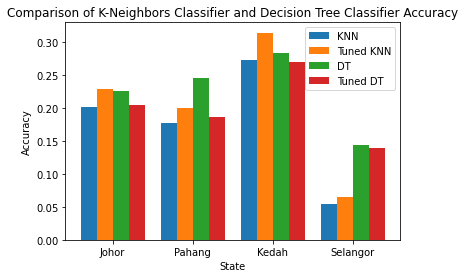

In [63]:
import matplotlib.pyplot as plt

# Data
states = ['Johor', 'Pahang', 'Kedah', 'Selangor']
knn_accuracy = knn_classifier_accuracy_df['Accuracy']
knn_accuracy_tuned = knn_classifier_accuracy_df_tuned['Accuracy']
dt_accuracy = dt_classifier_accuracy_df['Accuracy']
dt_accuracy_tuned = accuracy_dt_tuning_df['Accuracy']

# Bar positions
bar_width = 0.2
bar_positions = [1, 2, 3, 4]

# Plotting
plt.bar(bar_positions, knn_accuracy, width=bar_width, label='KNN')
plt.bar([p + bar_width for p in bar_positions], knn_accuracy_tuned, width=bar_width, label='Tuned KNN')
plt.bar([p + 2 * bar_width for p in bar_positions], dt_accuracy, width=bar_width, label='DT')
plt.bar([p + 3 * bar_width for p in bar_positions], dt_accuracy_tuned, width=bar_width, label='Tuned DT')

# Axes labels and title
plt.xlabel('State')
plt.ylabel('Accuracy')
plt.title('Comparison of K-Neighbors Classifier and Decision Tree Classifier Accuracy')
plt.xticks([p + 1.5 * bar_width for p in bar_positions], states)

# Legend
plt.legend()

# Show the plot
plt.show()


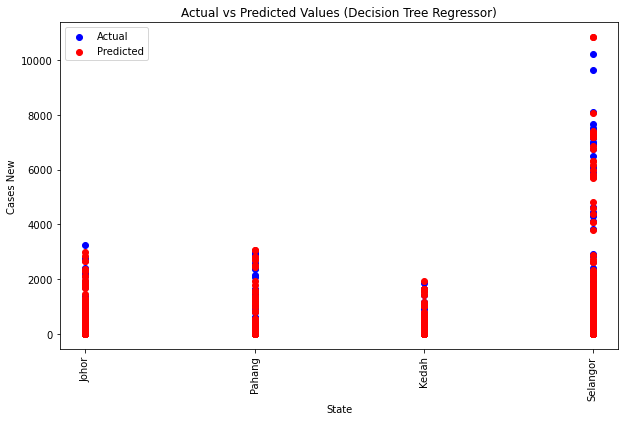

In [66]:
# Plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_df.index.get_level_values(0), predicted_values_df['Actual'], color='blue', label='Actual')
plt.scatter(predicted_values_df.index.get_level_values(0), predicted_values_df['Predicted'], color='red', label='Predicted')
plt.xlabel('State')
plt.ylabel('Cases New')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.xticks(range(len(states)), states, rotation='vertical')
plt.show()


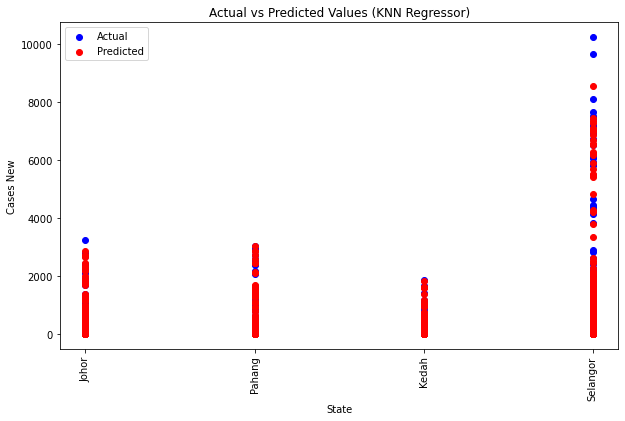

In [68]:
# Plot for KNN Regressor
plt.figure(figsize=(10, 6))
plt.scatter(knn_predicted_values_df.index.get_level_values(0), knn_predicted_values_df['Actual'], color='blue', label='Actual')
plt.scatter(knn_predicted_values_df.index.get_level_values(0), knn_predicted_values_df['Predicted'], color='red', label='Predicted')
plt.xlabel('State')
plt.ylabel('Cases New')
plt.title('Actual vs Predicted Values (KNN Regressor)')
plt.legend()
plt.xticks(range(len(states)), states, rotation='vertical')
plt.show()

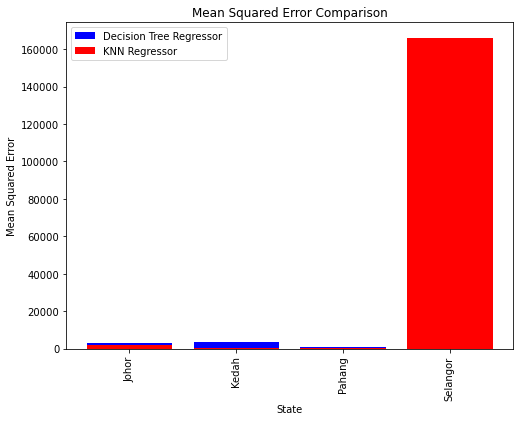

In [69]:
# Create a list of MSE values for Decision Tree Regressor and KNN Regressor
dt_regressor_mse = dt_regressor_mse_df['Mean Squared Error']
knn_regressor_mse = knn_regressor_mse_df['Mean Squared Error']

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.bar(dt_regressor_mse_df['State'], dt_regressor_mse, color='blue', label='Decision Tree Regressor')
plt.bar(knn_regressor_mse_df['State'], knn_regressor_mse, color='red', label='KNN Regressor')
plt.xlabel('State')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()
